# Project Iris

### Building a classifier to predict the class of a flower based on available attributes.

## Step 1: Import data

In [1]:
#import
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

#set font size to 14
plt.rc("font", size=14)

#set seaborn styles
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


print('The current working directory is: ' + os.getcwd())
iris_df = pd.read_csv('iris.data.csv', header=None)
iris_df

The current working directory is: /Users/Hayfiz/Dev/Data Science/Python Projects/Iris


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Explore the data

In [2]:
#Numeric column description
iris_df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
#Text column description
iris_df.describe(include=np.object)

,4
count,150
unique,3
top,Iris-setosa
freq,50


In [4]:
iris_df[4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

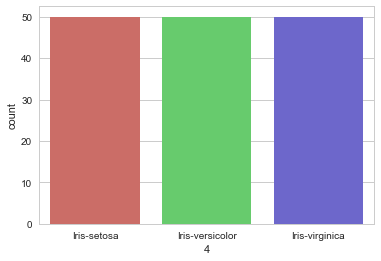

<Figure size 432x288 with 0 Axes>

In [5]:
sns.countplot(x=4, data=iris_df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [6]:
iris_df.groupby(4).mean()

,0,1,2,3
4,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [7]:
#Create data frame with only predictor columns
iris_df_2 = iris_df[[0, 1, 2, 3]]
iris_df_2

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [8]:
#import k means clustering from sklearn to perform logistic regression
from sklearn.cluster import KMeans

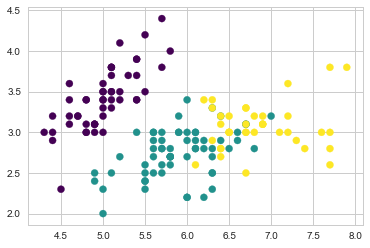

In [9]:
#Initial attempt to k means cluster the data (without standardisation of the data)
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_df_2)
y_kmeans = kmeans.predict(iris_df_2)
x = iris_df_2.iloc[:, 0]
y = iris_df_2.iloc[:, 1]
plt.scatter(x, y, c=y_kmeans, s=50, cmap='viridis')

In [10]:
frame_a = pd.DataFrame(iris_df_2)
frame_a['cluster'] = y_kmeans
frame_a['cluster'].value_counts()

1    62
0    50
2    38
Name: cluster, dtype: int64

In [11]:
#Create data frame with only predictor columns
iris_df_3 = iris_df_2[[0, 1, 2, 3]]
iris_df_3

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [12]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(iris_df_3)
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [13]:
#Second attempt to k means classify the data
# defining the kmeans function with initialization as k-means++
kmeans_2 = KMeans(n_clusters=3, init='k-means++')
# fitting the k means algorithm on scaled data
kmeans_2.fit(data_scaled)

# inertia on the fitted data
kmeans.inertia_

#predict
pred = kmeans_2.predict(data_scaled)

In [14]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    53
0    50
2    47
Name: cluster, dtype: int64